In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import numpy as np
from tueplots import bundles
from tueplots.constants.color import rgb

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [2]:
years = [2019, 2020, 2021, 2022]
months = months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
kWhp_system = 0.31 * 22

# load data and interpolated data
data = get_dataframe()
data_interpolated = get_dataframe(interpolate_data=True)

# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data_interpolated["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data_interpolated["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data_interpolated["Month"] = data["Date"].dt.month
# drop date
data = data.drop("Date", axis=1)

data.head()

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Year,Day of year,Month
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.0,0,7.9,7.1,965.6,4.1,87.0,5.2,2.7,1.9,2019,1,1
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.7,0,7.0,5.0,965.5,0.4,78.0,3.2,-2.1,-4.8,2019,2,1
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.9,0,7.4,3.9,971.2,-1.9,73.0,-0.6,-3.1,-4.4,2019,3,1
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.0,0,7.7,4.8,970.3,-1.1,85.0,-0.3,-1.7,-2.2,2019,4,1
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.0,5,7.6,5.9,963.8,0.0,96.0,1.0,-0.9,-0.8,2019,5,1


In [3]:
# production of one module per hour of sunshine for each day
prod_per_hour_per_module = np.divide(data["Gesamtanlage[kWh]"], data["SDK"], out=np.zeros_like(data["Gesamtanlage[kWh]"]), where=data["SDK"]!=0) / 22
prod_per_hour_per_module_interpolated = np.divide(data_interpolated["Gesamtanlage[kWh]"], data_interpolated["SDK"], 
                                                  out=np.zeros_like(data_interpolated["Gesamtanlage[kWh]"]), where=data_interpolated["SDK"]!=0) / 22
data["production per hour per module"] = prod_per_hour_per_module
data_interpolated["production per hour per module"] = prod_per_hour_per_module_interpolated
print("Maximum production per module and solar hour under optimum test conditions according to the manufacturer: 0.31 kWh")
print("Mean production per hour: " + str(np.round(prod_per_hour_per_module.mean(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.mean(), 2)) + " kWh")
print("Median production per hour: " + str(np.round(prod_per_hour_per_module.median(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.median(), 2)) + " kWh")
print("Maximum production per hour: " + str(np.round(prod_per_hour_per_module.max(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.max(), 2)) + " kWh")
print("Standard deviation: " + str(np.round(prod_per_hour_per_module.std(), 2)) + " - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.std(), 2)))

Maximum production per module and solar hour under optimum test conditions according to the manufacturer: 0.31 kWh
Mean production per hour: 0.37 kWh - interpolated: 0.44 kWh
Median production per hour: 0.13 kWh - interpolated: 0.13 kWh
Maximum production per hour: 38.18 kWh - interpolated: 39.92 kWh
Standard deviation: 1.58 - interpolated: 1.85


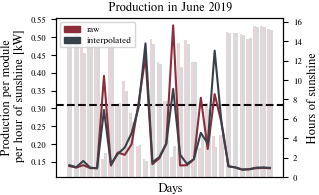

In [4]:
# August 2019
year = 2019
month = 6

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))

fig, ax = plt.subplots(1, 1, sharey=False)

col_interpol = rgb.tue_dark
col_data = rgb.tue_red

# axis for hours of sunshine
ax2 = ax.twinx()

month_data = data[(data["Year"] == year) & (data["Month"] == month)]
month_data_interpolated = data_interpolated[(data_interpolated["Year"] == year) & (data_interpolated["Month"] == month)]

# plot kWh peak
ax.axhline(0.31, color="black", linestyle="--")
# plot energy production per sunhour
ax.plot(
    month_data["Datum und Uhrzeit"],
    month_data["production per hour per module"],
    color=col_data
)
# plot energy production per sunhour with interpolated sunhours
ax.plot(
    month_data_interpolated["Datum und Uhrzeit"],
    month_data_interpolated["production per hour per module"],
    color=col_interpol
)
# # plot hours of sunshine
ax2.bar(
    np.arange(len(month_data))-0.2,
    month_data["SDK"],
    color=col_data,
    alpha=0.2,
    width=0.4)
# # plot interpolated hours of sunshine
ax2.bar(
    np.arange(len(month_data))+0.2,
    month_data_interpolated["SDK"],
    color=col_interpol,
    alpha=0.2,
    width=0.4)

#ax.set_yscale("log", base=10)
#ax.set_ylim(0,0.5)

# labels
plt.title("Production in June 2019")
plt.xticks([]) 

ax.set_xlabel('Days')
ax.set_ylabel('Production per module\n per hour of sunshine [kW]')
ax2.set_ylabel('Hours of sunshine')

# legend
colors = {'raw': col_data, 'interpolated':col_interpol}
patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
plt.legend(handles=patch, loc='upper left')
plt.savefig('../report/fig/prod_per_sunhour.pdf')
plt.show()